# Introduction

This notebook is created based on this guide: [Python Machine Learning: Scikit-Learn Tutorial](https://www.datacamp.com/community/tutorials/machine-learning-python)

**Summary:**

Using the built-in digits dataset from sklearn, we tried to build a machine learning model to map images with the corresponding labels from 0 to 9. There are 1,797 samples with 64 features representing a 8 x 8 bit image. We first loaded the data from sklearn and did some preliminary EDAs such as checking a few samples and using PCA to reduce dimensions for easier plotting. The next step was to center data around the mean and split into training and test data sets to make sure we would not violate the golden rule.

We originally built a KMeans model and realized it was a poor choice when evaluating the results using plots (PCA & Isomap) and applying different cluster quality metrics. We decided to switch to a SVC model by relying on the target labels and received much better outcomes. By doing an exhaustive grid search, we came up with the best hyperparameter values including a RBF kernel. However, switching to a linear kernel also yielded convincing results.

# 1. Read Data

## 1.1 Read from sklearn

In [1]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

## 1.2 Read training data from the Internet

In [2]:
import pandas as pd

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"
digits = pd.read_csv(url, header=None)

print(digits)

      0   1   2   3   4   5   6   7   8   9   ...  55  56  57  58  59  60  61  \
0      0   1   6  15  12   1   0   0   0   7  ...   0   0   0   6  14   7   1   
1      0   0  10  16   6   0   0   0   0   7  ...   0   0   0  10  16  15   3   
2      0   0   8  15  16  13   0   0   0   1  ...   0   0   0   9  14   0   0   
3      0   0   0   3  11  16   0   0   0   0  ...   0   0   0   0   1  15   2   
4      0   0   5  14   4   0   0   0   0   0  ...   0   0   0   4  12  14   7   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
3818   0   0   5  13  11   2   0   0   0   2  ...   0   0   0   8  13  15  10   
3819   0   0   0   1  12   1   0   0   0   0  ...   0   0   0   0   4   9   0   
3820   0   0   3  15   0   0   0   0   0   0  ...   0   0   0   4  14  16   9   
3821   0   0   6  16   2   0   0   0   0   0  ...   0   0   0   5  16  16  16   
3822   0   0   2  15  16  13   1   0   0   0  ...   0   0   0   4  14   1   0   

      62  63  64  
0      0

# 2. EDA

## 2.1 Check the data

In [3]:
digits = datasets.load_digits()

print("Keys are:\n", digits.keys())
print("Data is:\n", digits.data)
print("Targets are:\n", digits.target)
print("Description is:\n", digits.DESCR)

Keys are:
 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data is:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Targets are:
 [0 1 2 ... 8 9 8]
Description is:
 .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers

## 2.2 Check the the data shape

In [4]:
import numpy as np

digits_data = digits.data
print("Data shape:", digits_data.shape)

digits_target = digits.target
print("Target shape:", digits_target.shape)

number_digits = len(np.unique(digits.target))
print("Number of distinct targets:", number_digits)

digits_images = digits.images
print("Image shape:", digits_images.shape)

Data shape: (1797, 64)
Target shape: (1797,)
Number of distinct targets: 10
Image shape: (1797, 8, 8)


## 2.3 Visualize the data

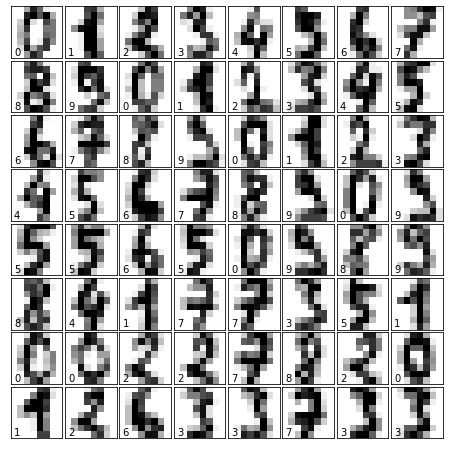

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))  # in inches

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    # Add a subplot of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label with the target value
    ax.text(0, 7, str(digits.target[i]))

plt.show()

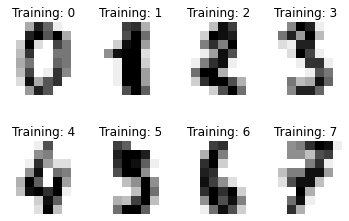

In [6]:
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Training: ' + str(label))

plt.show()

## 2.4 Perform Dimensionality Reduction Using PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(digits.data)

print("Reduced PCA shape:", reduced_data_pca.shape)
print(reduced_data_pca)

Reduced PCA shape: (1797, 2)
[[ -1.25946592  21.27488092]
 [  7.95761331 -20.76870088]
 [  6.99192109  -9.9559838 ]
 ...
 [ 10.80128219  -6.96025327]
 [ -4.87209496  12.42394854]
 [ -0.34439155   6.36555084]]


## 2.5 Do Scatter Plot

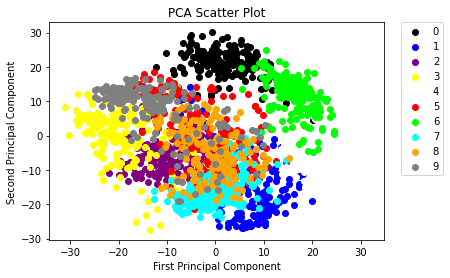

In [8]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
    x = reduced_data_pca[:, 0][digits.target == i]
    y = reduced_data_pca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])

plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

# 3. Preprocess

## 3.1 Scale the data

In [9]:
from sklearn.preprocessing import scale

data = scale(digits.data)

data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## 3.2 Split the data into training and test data sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    data, digits.target, digits.images, test_size=0.25, random_state=42)

## 3.3 Inspect the data

In [11]:
n_samples, n_features = X_train.shape
print("Number of samples:", n_samples)
print("Number of features:", n_features)

n_digits = len(np.unique(y_train))
print("Number of distinct digits:", n_digits)

print("Length of y_train:", len(y_train))

Number of samples: 1347
Number of features: 64
Number of distinct digits: 10
Length of y_train: 1347


# 4. Build Models

## 4.1 Create the KMeans model

In [12]:
from sklearn import cluster

clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

clf.fit(X_train)

KMeans(n_clusters=10, random_state=42)

## 4.2 Plot cluster centers

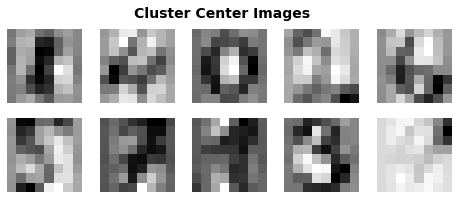

In [13]:
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    plt.axis('off')

plt.show()

## 4.3 Predict labels for test data

In [14]:
y_pred=clf.predict(X_test)

print("Test prediction:", y_pred[:100])
print("Test true value:", y_test[:100])

print("Shape of cluster centers:", clf.cluster_centers_.shape)

Test prediction: [4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
Test true value: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]
Shape of cluster centers: (10, 64)


## 4.4 Visualize the predicted labels using Isomap

In [15]:
def plot(data, predicted, true_labels, name):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle('Predicted Versus Training Labels ' + name, fontsize=14, fontweight='bold')
    fig.subplots_adjust(top=0.85)

    # Add scatterplots to the subplots 
    ax[0].scatter(data[:, 0], data[:, 1], c=predicted)
    ax[0].set_title('Predicted Training Labels')
    ax[1].scatter(data[:, 0], data[:, 1], c=true_labels)
    ax[1].set_title('Actual Training Labels')

    plt.show()

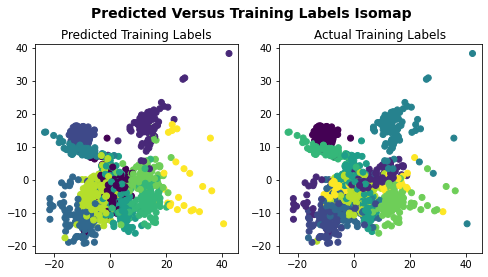

In [16]:
from sklearn.manifold import Isomap

X_iso = Isomap(n_neighbors=10).fit_transform(X_train)
clusters = clf.fit_predict(X_train)

plot(X_iso, clusters, y_train, "Isomap")

## 4.5 Visualize the predicted labels using PCA

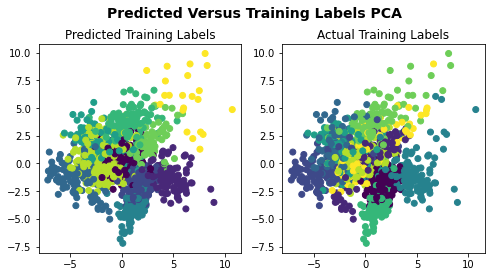

In [17]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(X_train)
clusters = clf.fit_predict(X_train)

plot(X_pca, clusters, y_train, "PCA")

# 5. Model Selection

## 5.1 Evaluate correctness by confusion matrix

In [18]:
from sklearn import metrics

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


## 5.2 Apply different cluster quality metrics

In [19]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

inertia    homo   compl  v-meas     ARI AMI  silhouette
54276   0.688   0.733   0.710   0.567   0.697    0.146


## 5.3 Use SVC with target values

In [20]:
from sklearn import svm

svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')
svc_model.fit(X_train, y_train)

SVC(C=100.0, gamma=0.001, kernel='linear')

## 5.4 Use grid search

In [21]:
from sklearn.model_selection import GridSearchCV

parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]


clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(X_train, y_train)

print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9732727523062096
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001


## 5.5 Train SVC with the best params

In [22]:
print(clf.score(X_test, y_test))

print(svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test))

0.9822222222222222
0.9822222222222222


## 5.6 Make prediction with SVC using the linear kernel

In [23]:
predicted = svc_model.predict(X_test)
print("Test prediction:", predicted)
print("Test true value:", y_test)

Test prediction: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 3 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 3 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 3 9 3 7 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 1 5 5 1 0 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 2 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5]
Test true value: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6

## 5.7 Visualize the result from SVC with linear kernel

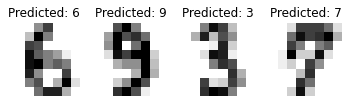

In [24]:
images_and_predictions = list(zip(images_test, predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Predicted: ' + str(prediction))

plt.show()

## 5.8 Check the performance from SVC with linear kernel

In [25]:
print("Classification Report\n", metrics.classification_report(y_test, predicted))
print("Confusion matrix\n", metrics.confusion_matrix(y_test, predicted))

Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.96      0.96      0.96        46
           4       1.00      1.00      1.00        55
           5       0.97      0.97      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       1.00      0.95      0.97        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Confusion matrix
 [[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  1  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  1  0 57  1  0  0  0]
 [

## 5.9 Visualize result from SVC with linear kernel using Isomap

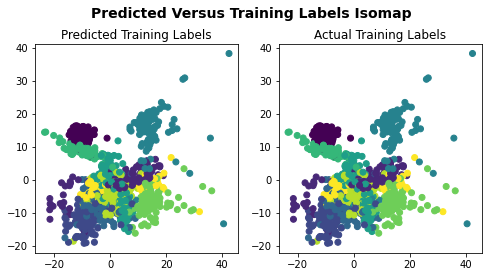

In [26]:
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)
predicted = svc_model.predict(X_train)

plot(X_iso, predicted, y_train, "Isomap")